# Hands-On Implementation

Generating Linearly Separable Data

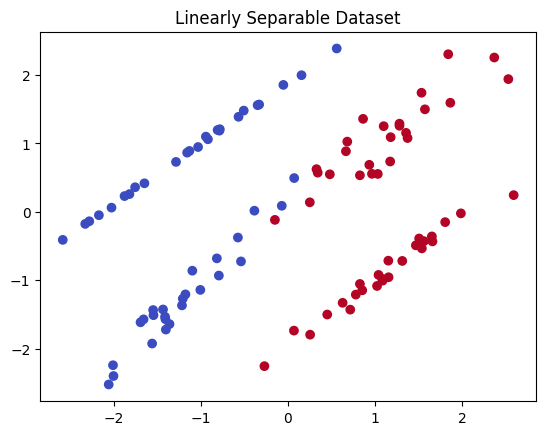

In [54]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
# Generate data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
 n_informative=2, n_redundant=0, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Linearly Separable Dataset")
plt.show()

Training SVM

In [55]:
from sklearn.svm import SVC
# Train the SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)
# Extract hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

Visualizing the Decision Boundary

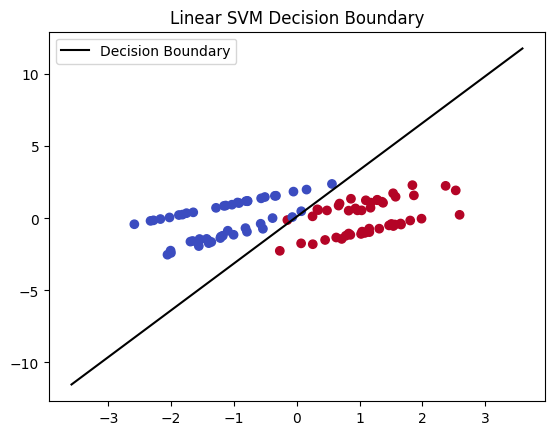

In [56]:
import numpy as np
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1] # Equation of hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.legend()
plt.title("Linear SVM Decision Boundary")
plt.show()


Input Space

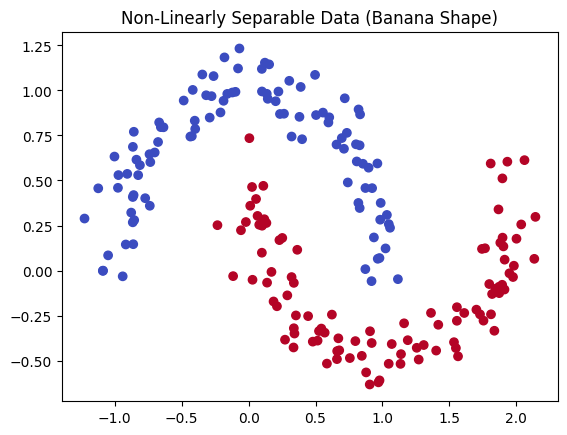

In [57]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# Generate data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Non-Linearly Separable Data (Banana Shape)")
plt.show()

Training SVM with RBF Kernel

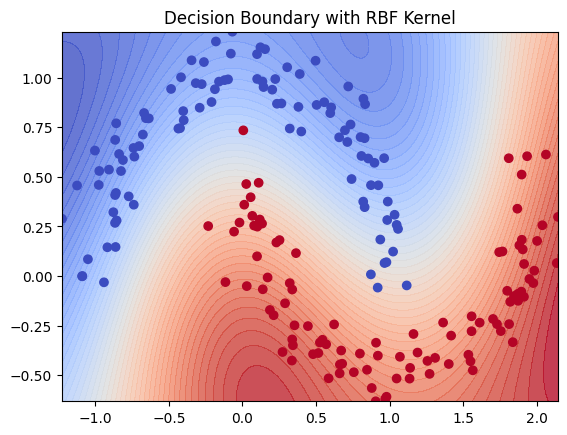

In [58]:
from sklearn.svm import SVC
# Train SVM with RBF Kernel
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X, y)
# Visualize decision boundary
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
 np.linspace(X[:, 1].min(), X[:, 1].max(), 200))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm",
alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Decision Boundary with RBF Kernel")
plt.show()

Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define parameter grid
param_grid = {
 'C': [0.1, 1, 10],
 'gamma': [0.1, 0.5, 1],
 'kernel': ['rbf']
}
# Initialize GridSearch
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


Visualizing Hyperparameter Tuning


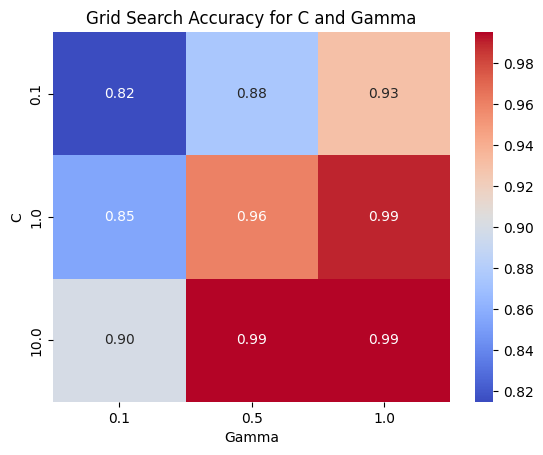

In [60]:
import seaborn as sns
import pandas as pd
# Example results (from grid_search.cv_results_)
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot(index='param_C', columns='param_gamma',
values='mean_test_score')
# Heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Grid Search Accuracy for C and Gamma")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()

Random Search – A Faster Alternative


In [61]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=5,
scoring='accuracy', random_state=42)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)

C:\Users\Abdul Rehman\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}


Visualize the Decision Boundary

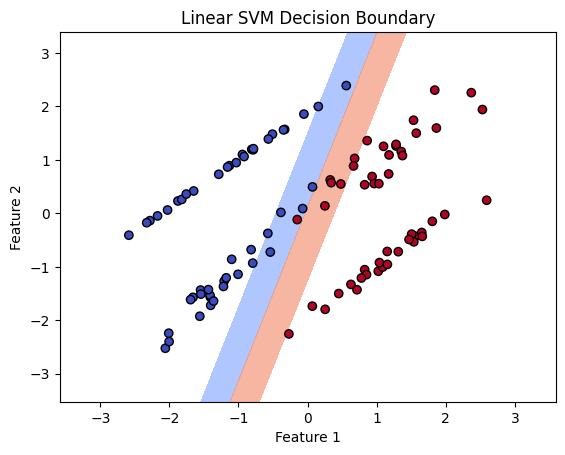

In [62]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
# Generate synthetic data
X, y = make_classification(n_features=2, n_classes=2, n_informative=2, n_redundant=0,
random_state=42)
# Train an SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)
# Create a grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
 np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
# Predict values for the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-',
'--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Visualizing Non-Linear Decision Boundaries

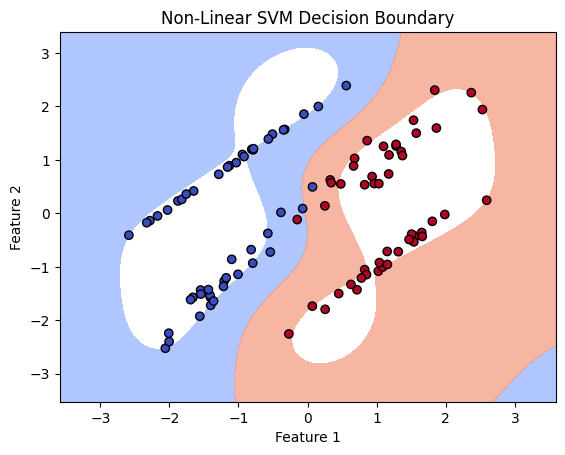

In [63]:
# Train an SVM with RBF kernel
model_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
model_rbf.fit(X, y)
# Predict values for the grid
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--',
'-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Mini Challenge:

    In this lab, the goal is to predict whether a banknote is genuine or forged based on various extracted features such as Variance, Skewness, Curtosis, and Entropy. The models used for this task include Support Vector Machines (SVM) with both Linear and Radial Basis Function (RBF) kernels. Hyperparameter tuning and dimensionality reduction techniques are also employed for better model performance and visualization.


Dataset Loading: The dataset is loaded from a .txt to .csv file. It contains features describing banknotes, along with their corresponding labels indicating whether the banknote is forged or genuine. The data is read into a DataFrame for easy manipulation and analysis.

Exploratory Data Analysis (EDA): Initial analysis of the data is performed using visualizations like histograms, pair plots, and correlation heatmaps. This helps in understanding the distribution of features, their interrelationships, and potential patterns or anomalies in the data. These visualizations provide insight into how the features are distributed and how they correlate with one another.

Data Preprocessing: Feature scaling is applied to standardize the data. This is done because SVM models are sensitive to the scale of the input features. Standardization ensures that each feature contributes equally to the model's learning process.

Splitting the Data: The dataset is divided into training and testing sets, with 80% used for training and 20% reserved for testing. This split ensures that the model can be trained on one portion of the data and evaluated on a separate, unseen portion to estimate its performance in real-world applications.

Model Training (Linear Kernel): An SVM model with a linear kernel is trained on the scaled training data. The linear kernel is chosen when the data is expected to be linearly separable or when simplicity is desired. The model learns to separate the genuine and forged banknotes based on the features.

Model Evaluation: After training, the model is evaluated using metrics such as precision, recall, F1-score, and accuracy. These metrics help assess the model's performance in terms of its ability to correctly classify both genuine and forged banknotes. The classification report provides a comprehensive view of how well the model is performing.

Cross-Validation: To further evaluate the model's performance and ensure it generalizes well to unseen data, cross-validation is performed. This involves splitting the data into multiple subsets and evaluating the model on different subsets. The average performance across all subsets provides a more reliable estimate of the model's true performance. Thee whole step is repeated for RBF Kernel also.

Hyperparameter Tuning (Grid Search): Grid Search is used to optimize the hyperparameters of the SVM model, specifically the C and gamma parameters for the RBF kernel. By systematically evaluating different combinations of hyperparameters, the best configuration is identified, leading to improved model performance.

Grid Search Results and Visualization: The results of the Grid Search are visualized using a heatmap. This heatmap shows how the accuracy of the model varies with different values of C and gamma, providing a clear view of the optimal values for these parameters.

Dimensionality Reduction (PCA): Principal Component Analysis (PCA) is used to reduce the dimensionality of the data to two components, allowing for a simplified and visualizable representation of the data. PCA helps in understanding the underlying structure of the data while retaining most of the variance.

SVM Decision Boundary Visualization: After reducing the data dimensions using PCA, the SVM decision boundary is visualized on the 2D plot. This visualization shows how the SVM model classifies the data points and provides an intuitive understanding of how the model distinguishes between genuine and forged banknotes.

Final Evaluation and Conclusion: After tuning the hyperparameters for the RBF kernel, the model achieves 100% accuracy in classification during cross-validation. The visualizations, such as the decision boundary and the impact of PCA, provide a clearer understanding of how the SVM model separates the data into classes. The model's performance is excellent, and the process highlights the importance of both hyperparameter tuning and dimensionality reduction in achieving optimal results.

Key Results:
The SVM model with an RBF kernel outperforms the linear kernel in terms of classification accuracy.
The best hyperparameters found through Grid Search are C = 1 and gamma = 0.5.
The final model achieved 100% accuracy during cross-validation, indicating excellent generalization and performance.

Conclusion:
The approach demonstrates the effectiveness of Support Vector Machines (SVM) for the Banknote Authentication problem. The use of linear and RBF kernels, along with hyperparameter tuning and PCA for visualization, resulted in an optimal model capable of achieving perfect classification accuracy. This project highlights the power of SVMs, cross-validation, and hyperparameter tuning in machine learning tasks, ensuring that the model is robust and generalizes well to unseen data.








Importing Required Libraries for Data Preprocessing, Model Training, and Evaluation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Previewing the Dataset

In [2]:
columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Target']  # Define column names
data = pd.read_csv('data_banknote_authentication.txt', delimiter=',', names=columns)

# Preview the data
print(data.head())


   Variance  Skewness  Curtosis  Entropy  Target
0   3.62160    8.6661   -2.8073 -0.44699       0
1   4.54590    8.1674   -2.4586 -1.46210       0
2   3.86600   -2.6383    1.9242  0.10645       0
3   3.45660    9.5228   -4.0112 -3.59440       0
4   0.32924   -4.4552    4.5718 -0.98880       0


Calculate the mean of each column

In [3]:
column_means = data.mean()
print("Mean of each column:")
print(column_means)

Mean of each column:
Variance    0.433735
Skewness    1.922353
Curtosis    1.397627
Entropy    -1.191657
Target      0.444606
dtype: float64


Check for null values in the dataset

In [4]:
null_values = data.isnull().sum()
print("\nNull values in each column:")
print(null_values)


Null values in each column:
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Target      0
dtype: int64


Visualizing Feature Distributions with Histograms

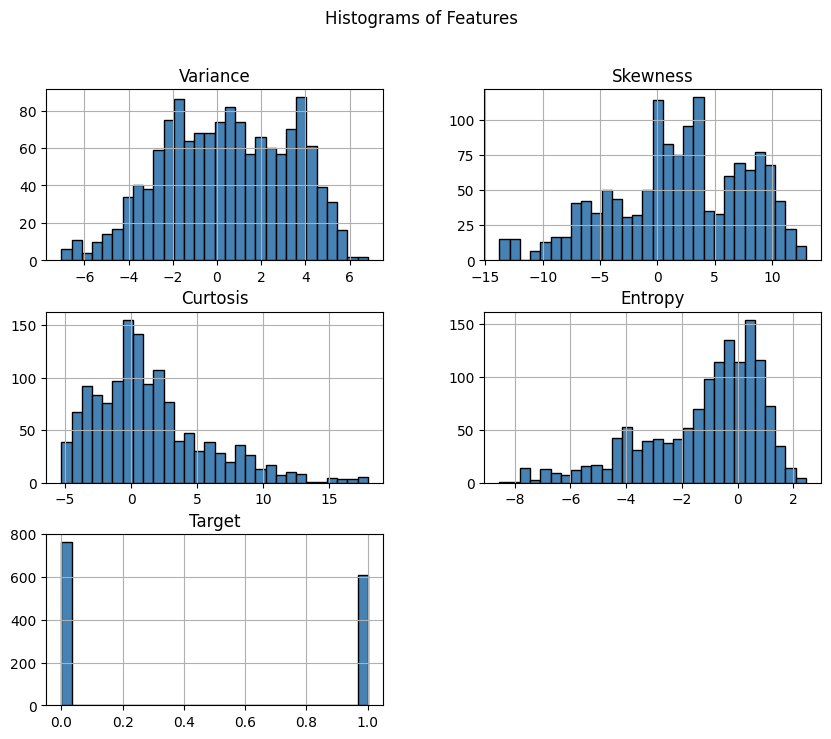

In [5]:
# Histogram for each feature
data.hist(bins=30, figsize=(10, 8), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

Visualizing Relationships Between Features Using Pair Plot

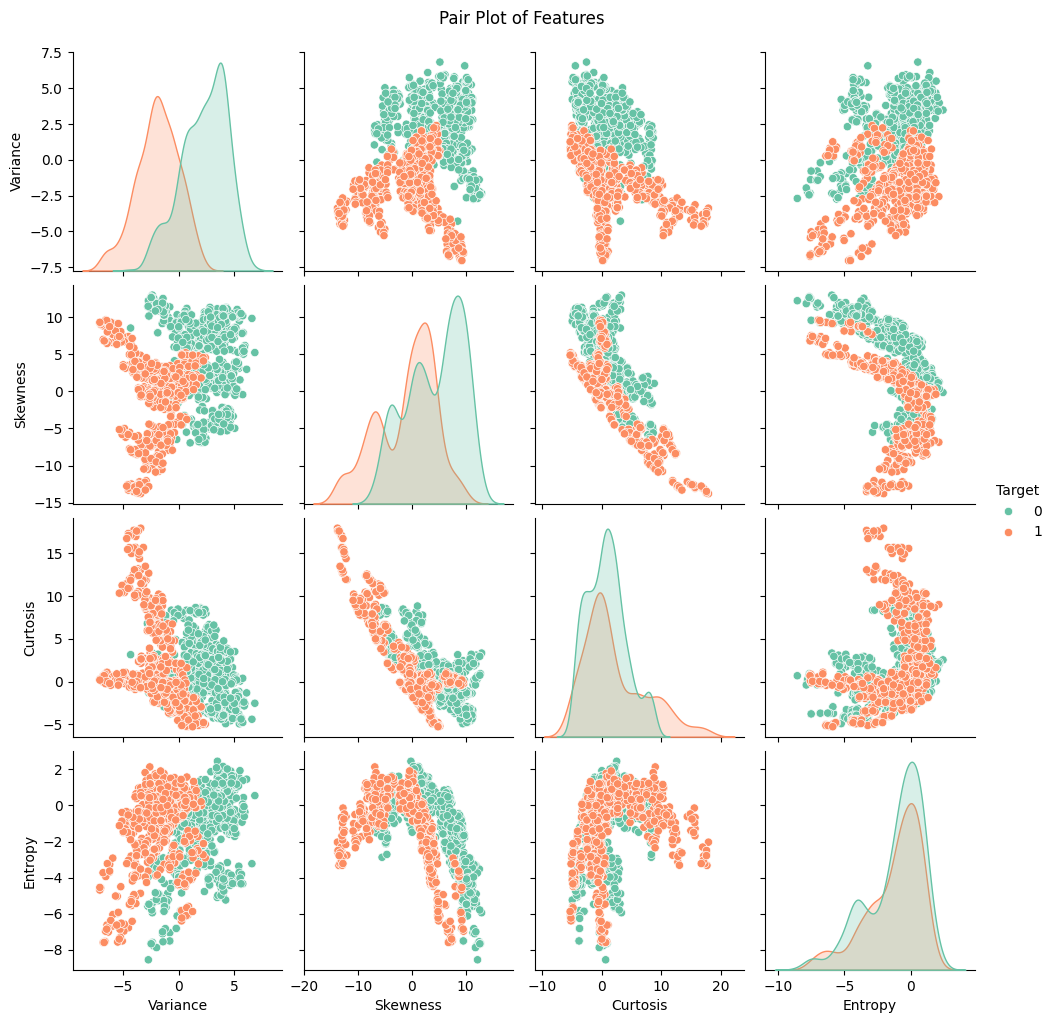

In [6]:
# Pair plot to see relationships between variables
sns.pairplot(data, hue='Target', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

Visualizing Feature Correlations with a Heatmap

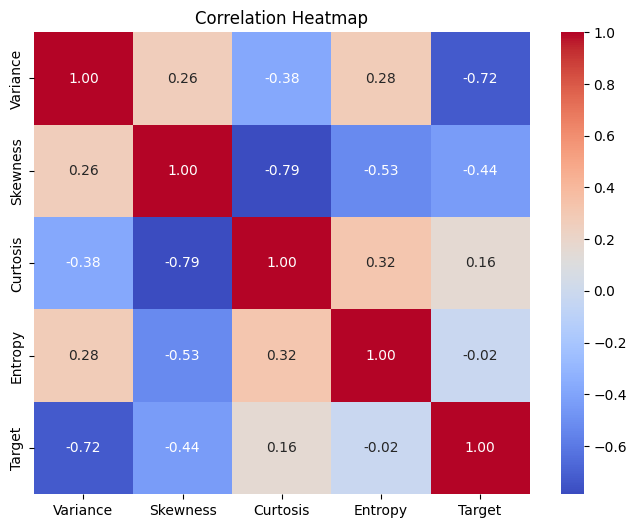

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Scatter Plot: Variance vs Skewness by Target Clas

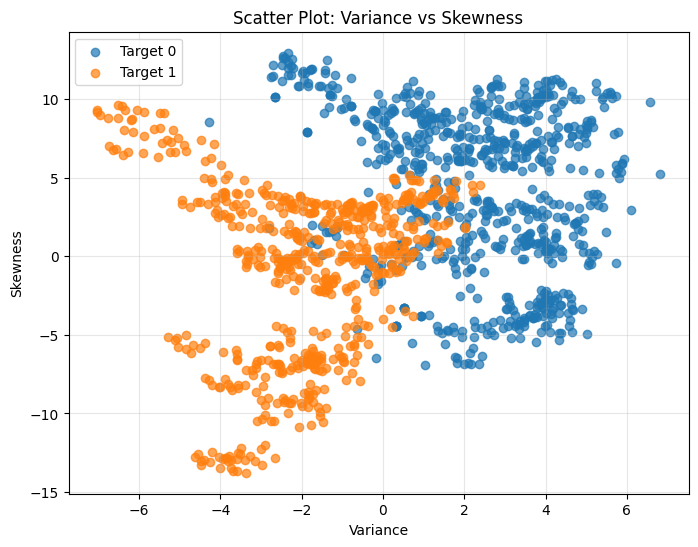

In [8]:
# Scatter plot for Variance vs Skewness
plt.figure(figsize=(8, 6))
for target in data['Target'].unique():
    subset = data[data['Target'] == target]
    plt.scatter(subset['Variance'], subset['Skewness'], label=f'Target {target}', alpha=0.7)

plt.title('Scatter Plot: Variance vs Skewness')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.grid(alpha=0.3)
plt.show()




Scatter Plot: Variance vs Curtosis by Target Class

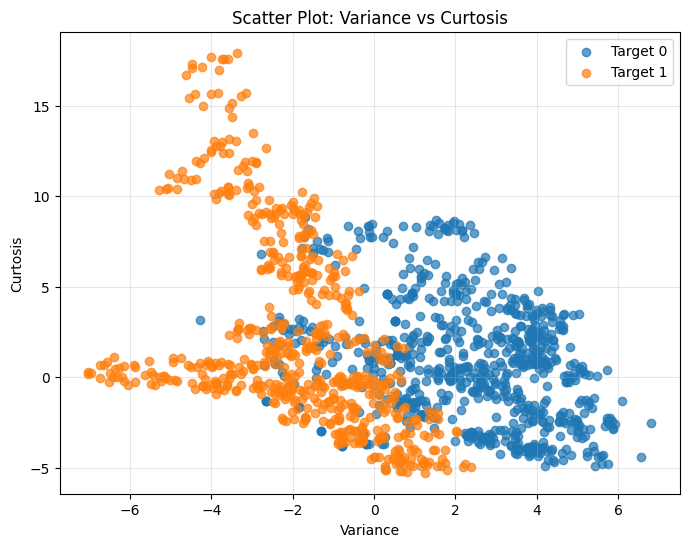

In [9]:
# Scatter plot for Variance vs Curtosis
plt.figure(figsize=(8, 6))
for target in data['Target'].unique():
    subset = data[data['Target'] == target]
    plt.scatter(subset['Variance'], subset['Curtosis'], label=f'Target {target}', alpha=0.7)

plt.title('Scatter Plot: Variance vs Curtosis')
plt.xlabel('Variance')
plt.ylabel('Curtosis')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Splitting the Data into Features (X) and Target (y)

In [10]:
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

Data Preprocessing: Scaling and Splitting the Dataset

In [11]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=41)

Training the SVM Model with a Linear Kernel

In [12]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Model Evaluation: Classification Report for SVM with Linear Kerne

In [13]:
# Evaluation
y_pred = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.98      1.00      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



Cross-Validation: SVM with Linear Kernel

In [14]:
linear_scores = cross_val_score(svm_linear, X_scaled, y, cv=5)
print("Linear Kernel Cross-Validation Scores:", linear_scores)
print("Linear Kernel Mean Score:", linear_scores.mean())

Linear Kernel Cross-Validation Scores: [0.98909091 0.98909091 0.97810219 0.99270073 0.98175182]
Linear Kernel Mean Score: 0.9861473125414731


Confusion Matrix for SVM with Linear Kernel

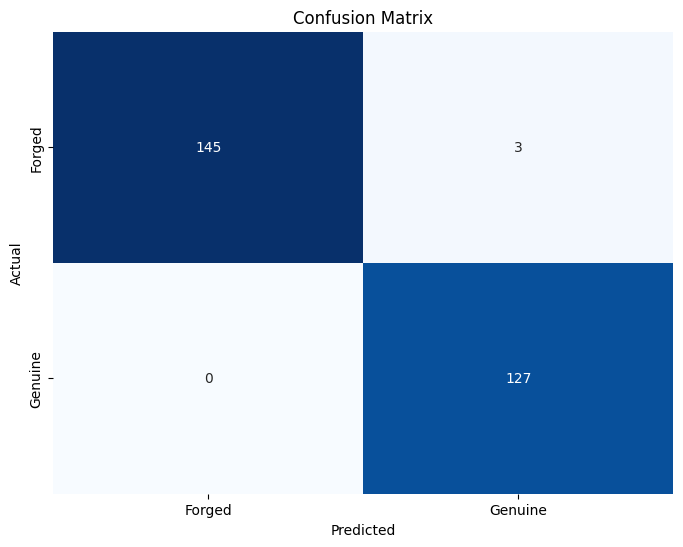

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Forged', 'Genuine'], yticklabels=['Forged', 'Genuine'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training the SVM Model with a RBF Kernel

In [16]:
# SVM Model rbf kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

Model Evaluation: Classification Report for SVM with RBF Kerne

In [17]:
# Evaluation
y_pred = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Cross-Validation: SVM with RBF Kernel

In [18]:
scores = cross_val_score(svm_rbf, X_scaled, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0


Confusion Matrix for SVM with RBF Kernel

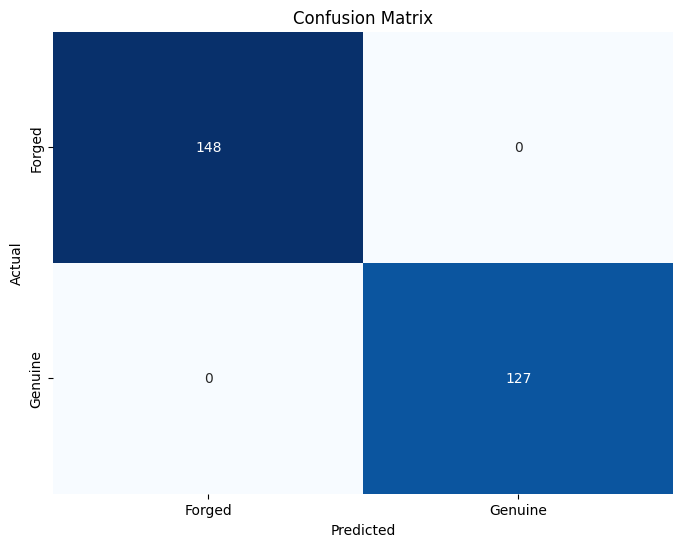

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Forged', 'Genuine'], yticklabels=['Forged', 'Genuine'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Principal Component Analysis (PCA) for Dimensionality Reduction and Visualization

In [20]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


PCA Visualization: 2D Scatter Plot of Features

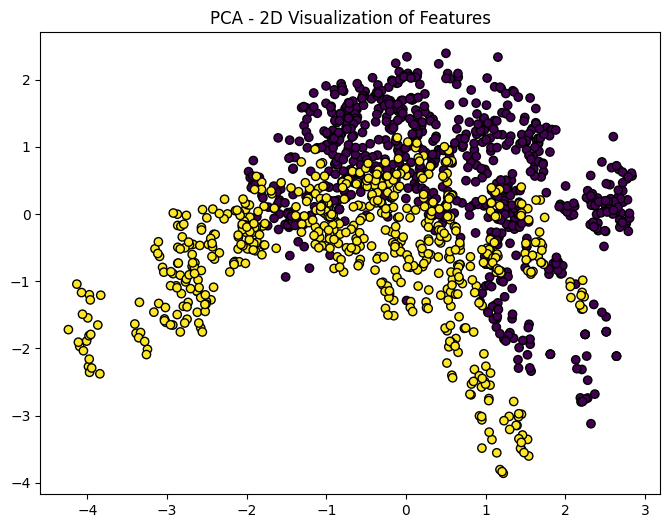

In [21]:
# Plot PCA and Decision Boundary
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA - 2D Visualization of Features')
plt.show()


Decision Boundary Visualization on PCA-Reduced Data

In [22]:
# Decision Boundary Visualization (using PCA-reduced data)
# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_rbf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

SVM Decision Boundary Visualization on PCA-Reduced Features

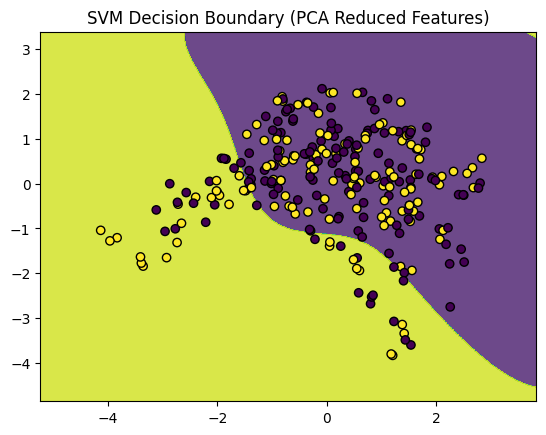

In [23]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_test, edgecolor='k', marker='o')
plt.title('SVM Decision Boundary (PCA Reduced Features)')
plt.show()

# Bonus Task:


Grid Search for Hyperparameter Tuning of SVM with RBF Kernel

In [24]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.5, 1],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# Best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 1.0



Heatmap of Grid Search Accuracy for Hyperparameters C and Gamma

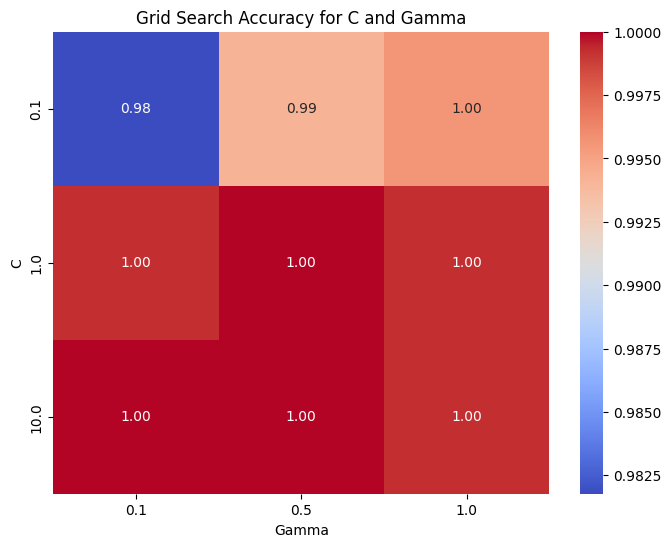

In [25]:
# Convert Grid Search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table for visualisation
pivot_table = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Grid Search Accuracy for C and Gamma")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()
